# Data Science Learning Path for Security


# Part 1  - Statistical Foundations

In [58]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
print(f"sns version is {sns.__version__}")
import statsmodels.api as sm

sns version is 0.11.2


## Table of Contents 
- [Measures of Central Tendency](##-Section-1.1-Measures-of-Central-Tendency)

- [Measures of Dispersion](##-Measures-of-Dispersion-1.2)

- [Exploring the Data Distribution using visualizations](##-Exploring-the-Data-Distribution-using-visualizations-1.3)

- [Exploring Binary and Categorical Data](##-Exploring-Binary-and-Categorical-Data-1.4)

- [Data Types](##-Data-Types-1.5)

- [Probability Distributions](##-Probability-Distributions-1.6)

- [Measures of Relatedness](##-Measures-of-Relatedness-1.7)

- [Statistical Experiments And Significance Testing](##-Statistical-Experiments-And-Significance-Testing-1.8)

## Section 1.1 Measures of Central Tendency 

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

[st.skewnorm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html)

In [2]:
x = st.skewnorm.rvs(10, size=1000)

In [3]:
x[0:20]

array([0.62293267, 0.32546791, 0.61083765, 0.6430439 , 0.10323345,
       0.69395734, 0.16042889, 0.20836459, 1.58141097, 0.94691847,
       2.07011578, 1.05698232, 1.1339513 , 0.28175876, 0.8100788 ,
       0.19137173, 0.74777673, 0.66013882, 1.02579064, 1.60486504])

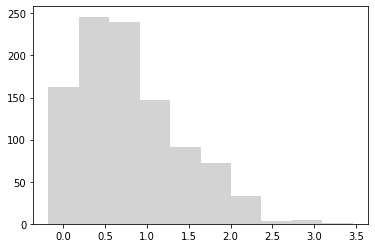

In [4]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [5]:
xbar = x.mean()
xbar

0.791485467144772

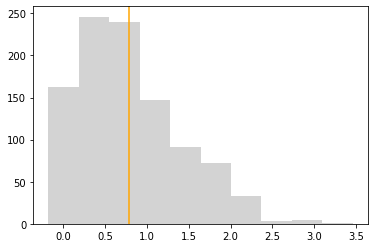

In [6]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

Mean is subject to influence of extreme values. 

To counteract a single value skewing results, there are multiple variationns of the mean

#### Trimmed mean

A trimmed mean eliminates the influence of extreme values

$$ \bar{x} = \frac{\sum_{i=p+1}^(n-p) x_i}{n-2p} $$

trim 10% of values from each end

In [7]:
st.trim_mean(x, 0.1)

0.7348983988361006

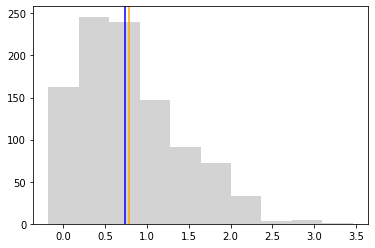

In [8]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
plt.axvline(x = st.trim_mean(x, 0.1),  color='blue')
_ = plt.hist(x, color = 'lightgray')

#### Weighted mean

Multiplying each data value by $X_i$ by a user specified weight $W_i$ and dividing their sum by the sum of the weights

$$ \bar{x_w} = \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i} $$

Main motivations for weighted mean
- Some values are intrinsically more variable than others, and highly variable observations are given a lower weight. For example, if we are taking the average from multiple sensors and one of the sensors is less accurate, then we might downweight the data from that sensor.


- The data collected does not equally represent the different groups that we are interested in measuring. For example, because of the way an online experiment was conducted, we may not have a set of data that accurately reflects all groups in the user base. To correct that, we can give a higher weight to the values from the groups that were underrepresented.

In [9]:
crime_data = pd.read_csv('./state_crime.csv')

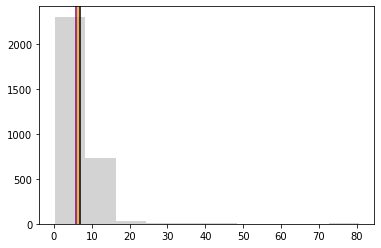

In [10]:
fig, ax = plt.subplots()
plt.axvline(x = crime_data['Data.Rates.Violent.Murder'].mean(), color='orange')
plt.axvline(x = st.trim_mean(crime_data['Data.Rates.Violent.Murder'], 0.1),  color='purple')
plt.axvline(x = np.average(crime_data['Data.Rates.Violent.Murder'], weights=crime_data['Data.Population']),  color='black')
_ = plt.hist(crime_data['Data.Rates.Violent.Murder'], color = 'lightgray')

In [11]:
crime_data.loc[crime_data.Year == crime_data.Year.max()][['State', 'Year', 'Data.Population', 'Data.Totals.Violent.Murder', 'Data.Rates.Violent.Murder']].head()

,State,Year,Data.Population,Data.Totals.Violent.Murder,Data.Rates.Violent.Murder
59,Alabama,2019,4903185,358,7.3
119,Alaska,2019,731545,69,9.4
179,Arizona,2019,7278717,365,5.0
239,Arkansas,2019,3017804,242,8.0
299,California,2019,39512223,1690,4.3


In [12]:
np.average(crime_data['Data.Rates.Violent.Murder'])

6.477207062600321

In [13]:
np.average(crime_data['Data.Rates.Violent.Murder'], weights=crime_data['Data.Population'])

6.838440316176802

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution: 



In [14]:
np.median(x) 

0.677148325904757

The **mode** is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

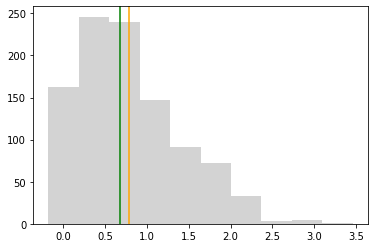

In [15]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

#### Mode

The mod is the value that appears momst often in the data. 

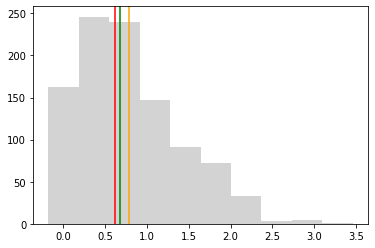

In [16]:
x_count = Counter(x)
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
plt.axvline(x = x_count.most_common(1)[0][0], color='red')
_ = plt.hist(x, color = 'lightgray')

The mode is least impacted by skew, but is only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

#### central tendency on normal distrubtion

In [17]:
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

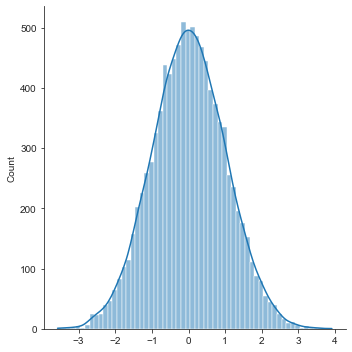

In [21]:
x = np.random.normal(size=10000)
sns.set_style('ticks')
_ = sns.displot(x, kde=True)

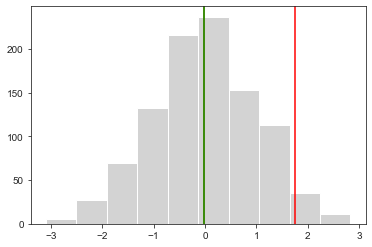

In [22]:
x_count = Counter(s)
fig, ax = plt.subplots()
plt.axvline(x = np.mean(s), color='orange')
plt.axvline(x = np.median(s), color='green')
plt.axvline(x = x_count.most_common(1)[0][0], color='red')
_ = plt.hist(s, color = 'lightgray')

## Summary 1.1

[measures-central-tendency-mean-mode-median](https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php)



When you have a normally distributed sample you can legitimately use both the mean or the median as your measure of central tendency. In fact, in any symmetrical distribution the mean, median and mode are equal.

With **normally distributed samples**, the **mean** is widely preferred as the best measure of central tendency because it is the measure that **includes all the values** in the data set for its calculation, and any change in any of the scores will affect the value of the mean. This is not the case with the median or mode.

- What is the best measure of central tendency?
  - There can often be a "best" measure of central tendency with regards to the data you are analysing, but there is **no one "best" measure of central tendency**. This is because whether you use the median, mean or mode will depend on the type of data you have, such as nominal or continuous data; whether your data has outliers and/or is skewed; and what you are trying to show from your data. 


- In a strongly skewed distribution, what is the best indicator of central tendency?
  - It is usually inappropriate to use the mean in such situations where your data is skewed. You would normally choose the **median or mode**, with the median usually preferred. 
  
  
- When is the **mean** the best measure of central tendency?
  - The mean is usually the best measure of central tendency to use when your data distribution is continuous and symmetrical, such as when your data is normally distributed. However, it all depends on what you are trying to show from your data.


- When is the **mode** the best measure of central tendency?
  - The mode is the least used of the measures of central tendency and can **only be used when dealing with nominal data**. For this reason, the mode will be the best measure of central tendency (as it is the only one appropriate to use) when dealing with nominal data. The mean and/or median are usually preferred when dealing with all other types of data, but this does not mean it is never used with these data types.


- When is the **median** the best measure of central tendency?
  - The median is usually preferred to other measures of central tendency **when your data set is skewed** (i.e., forms a skewed distribution) or you are dealing with ordinal data. However, the mode can also be appropriate in these situations, but is not as commonly used as the median.


- What is the most appropriate measure of central tendency when the data has outliers?
  - The **median** is usually preferred in these situations because the value of the mean can be distorted by the outliers. However, it will depend on how influential the outliers are. If they do not significantly distort the mean, using the mean as the measure of central tendency will usually be preferred.

## Measures of Dispersion 1.2


#### Variance

The sum of squarred deviations from the mean divided by `n-1` where `n` is the number of data

Variability, aslo refereed to as dispersion, measures whether the data values are tightly clustered or spread out.

At the heart of statistics lies variability: measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in the presence of it.

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [135]:
x.var??

Docstring:
a.var(axis=None, dtype=None, out=None, ddof=0, keepdims=False)

Returns the variance of the array elements, along given axis.

Refer to `numpy.var` for full documentation.

See Also
--------
numpy.var : equivalent function
Type:      builtin_function_or_method

In [134]:
x.var()

0.4134838587510018

Just as there are different ways to measure location (mean, median, etc.), there are also different ways to measure variability.


### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with  𝜎 sigma), which is convenient because its units are on the same scale as the values in the distribution

The most widely used estimates of variation are based on the differences, or deviations, between the estimate of location and the observed data

For a set of data `{1, 4, 4}`, the mean is `3` and the median is `4`. The deviations from the mean are the differences: `1 – 3 = –2, 4 – 3 = 1, 4 – 3 = 1`. These deviations tell us how dispersed the data is around the central value.

$$ \sigma = \sqrt{\sigma^2} $$

The best-known estimates of variability are the variance and the standard deviation, which are based on squared deviations. 

The **variance** is an average of the squared deviations, and the **standard deviation** is the square root of the variance:

The **standard deviation is much easier to interpret** than the variance since it is on the **same scale** as the original data

It owes its preeminence to statistical theory: mathematically, working with squared values is much more convenient than absolute values, especially for statistical models.

Variance =  $ s^2 = \frac{\sum \limits _{i=1} ^{n} (x_i - \bar{x})^2}{n-1} $


Standard Deviation $ s =   \sqrt {Variance}  $ 

$\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} \left(x_{i} - \bar{x}\right)^{2}} {n-1}}$


In [27]:
x.var()**(1/2), x.std()

(0.9995680033229493, 0.9995680033229493)

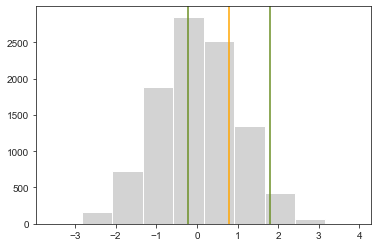

In [28]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Mean absolute deviation

$\bar{x} $ is the sample mean

$$ \frac{\sum_{i=1}^n |x_i - \bar{x}|}{n} $$


One way to measure variability is to estimate a typical value for these deviations. 

Averaging the deviations themselves would not tell us much—the negative deviations offset the positive ones. 

In fact, the sum of the deviations from the mean is precisely zero. 

Instead, a simple approach is to take the average of the absolute values of the deviations from the mean. In the preceding example, the absolute value of the deviations is {2 1 1}, and their average is (2 + 1 + 1) / 3 = 1.33. 

This is known as the mean absolute deviation and is computed with the formula:

In [36]:
pd.Series(s).mad()

0.7972027929747237

> DEGREES OF FREEDOM, AND N OR N – 1?
If you use the intuitive denominator of n in the variance formula, you will underestimate the true value of the variance and the standard deviation in the population. This is referred to as a biased estimate. However, if you divide by n – 1 instead of n, the variance becomes an unbiased estimate.

> To fully explain why using n leads to a biased estimate involves the notion of degrees of freedom, which takes into account the number of constraints in computing an estimate. In this case, there are n – 1 degrees of freedom since there is one constraint: the standard deviation depends on calculating the sample mean. For most problems, data scientists do not need to worry about degrees of freedom.



Neither the variance, the standard deviation, nor the mean absolute deviation is robust to outliers and extreme values

A robust estimate of variability is the median absolute deviation from the median or MAD:
    
$$ Median(|x_1-m|,|x_2 - m|, ... ,|x_n - m|) $$

Where m is the median. MAD is not influenced by extreme values. 

In [37]:
st.median_abs_deviation(s)

0.6828224537717925

** Note **

The variance, the standard deviation, the mean absolute deviation, and the median absolute deviation from the median **are not equivalent estimates**, even in the case where the data comes from a normal distribution. 

In fact, the **standard deviation** is **always greater** than the **mean absolute deviation**, which itself is **greater** than the **median absolute deviation**. 

Sometimes, the median absolute deviation is multiplied by a constant scaling factor to put the MAD on the same scale as the standard deviation in the case of a normal distribution. The commonly used factor of 1.4826 means that 50% of the normal distribution fall within the range

In [43]:
std = np.std(s) 
mean_abs_d = pd.Series(s).mad()
median_abs_d = st.median_abs_deviation(s)

std > mean_abs_d > median_abs_d

True

### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$


Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of 
*Intro to Stats*.

**standard error measures the variability of a sample metric**


The standard error is a single metric that sums up the variability in the sampling distribution for a statistic.

As the **sample size increases**, the **standard error decreases**. 

The relationship between standard error and sample size is sometimes referred to as the **square root of n rule**: to reduce the standard error by a factor of 2, the sample size must be increased by a factor of 4.

The validity of the standard error formula arises from the central limit theorem. In fact, you don’t need to rely on the central limit theorem to understand standard error. Consider the following approach to measuring standard error:

- Collect a number of brand-new samples from the population.

- For each new sample, calculate the statistic (e.g., mean).

- Calculate the standard deviation of the statistics computed in step 2; use this as your estimate of standard error.

**In practice, this approach of collecting new samples to estimate the standard error is typically not feasible (and statistically very wasteful)**

In modern statistics, the **bootstrap** has become the standard way to estimate standard error. It can be used for virtually any statistic and does not rely on the central limit theorem or other distributional assumptions.

In [222]:
sigma/(x.size)**(1/2)

0.14002800840280097

In [225]:
st.sem??

In [220]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

0.5178713120903664

ddof : int, optional
        Delta degrees-of-freedom. 
        
        How many degrees of freedom to adjust
        for bias in limited samples relative to the population estimate
        of variance. Defaults to 1.

In [221]:
st.sem(x, ddof=0)

0.5127690072443828

### z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is: 
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. You could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [60]:
x_i = 85
mu = 60
sigma = 10

In [73]:
x = np.random.normal(mu, sigma, 10000)

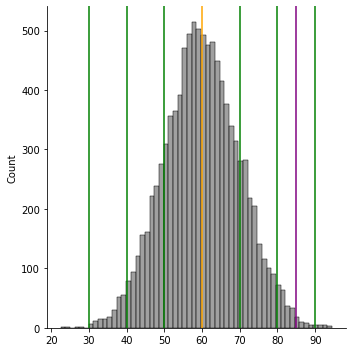

In [74]:
sns.displot(x, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='green')
_ = plt.axvline(x_i, color='purple')

z-score of 2.5 STD above the mean

In [75]:
z = (x_i - mu) /sigma
z

2.5

Or using our simulated class of 10k CS101 students: 

In [76]:
z = (x_i - np.mean(x))/np.std(x)
z

2.512458054746667

Less than one percent of the class outperformed you: 
- Remember from the sample that this is a very large class

- 47 people did better than you. **This will value will change if you rerun x as it is randomly creating a normal distribution**

In [79]:
num_better_scores = len(np.where(x > 85)[0])
num_better_scores

47

Less than 1 percent of individuals did better than you 

In [80]:
100*num_better_scores/10000

0.47

Your score is in the 99th percentile

In [81]:
np.percentile(x, 99)

82.92060411486534

In contrast, if the mean score of your peers is 90 and the standard deviation is 2: 

In [85]:
mu = 90 
sigma = 2

In [86]:
y = np.random.normal(mu, sigma, 10000)

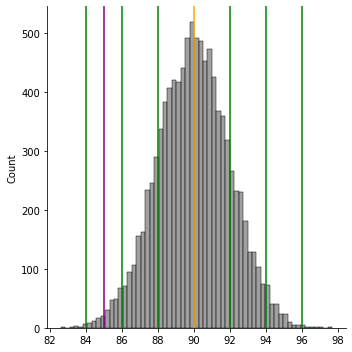

In [87]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='green')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 STD below the mean

In [88]:
z = (x_i - mu)/sigma
z

-2.5

Or using our simulated class of 10k CS101 students: 

In [89]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.508342655120991

In which case, over 99% of the class outperformed you: 

In [90]:
len(np.where(y > 85)[0])

9936

In [91]:
100*9933/10000

99.33

In [93]:
10000 - 9936 

64

In [94]:
np.percentile(y, 1)

85.34148724004365

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**. 

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.

### Estimates Based on Percentiles


A different approach to estimating dispersion is based on looking at the spread of the sorted data. 

Statistics based on _sorted (ranked) data_ are referred to as **order statistics**. 

The most basic measure is the range: the difference between the largest and smallest numbers.

The idea is divide the data into 4 equal groups and see how far aprt the extreme groups are 

The minimum and maximum values themselves are useful to know and are helpful in identifying outliers, but the **range is extremely sensitive to outliers** and **not very useful as a general measure of dispersion** in the data.

In [112]:
crime_filter = (crime_data.Year == 2019) & (crime_data.State != 'United States')

In [113]:
crime_data.loc[crime_filter]['Data.Rates.Violent.Murder'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]).to_frame()

,Data.Rates.Violent.Murder
0.05,1.90
0.25,2.55
0.50,4.60
0.75,6.40
0.95,10.30


#### IQR

A common measurement of variability is the difference between the 25th percentile and the 75th percentile, called the **interquartile range (or IQR)**. 

Here is a simple example: `{3,1,5,3,6,7,2,9}`. We sort these to get `{1,2,3,3,5,6,7,9}`. 

The **25th** percentile is at `2.5`, and the **75th** percentile is at `6.5`, so the interquartile range is `6.5 – 2.5 = 4.`

In [115]:
print("STD: ", crime_data.loc[crime_filter]['Data.Population'].std())
print("IQR: ", crime_data.loc[crime_filter]['Data.Population'].quantile(0.75) - crime_data.loc[crime_data.Year == 2019]['Data.Population'].quantile(0.25))
sm.robust.scale.mad(crime_data.loc[crime_filter]['Data.Population'])

STD:  7360660.467814472
IQR:  5655928.5


4167660.070716861

In [59]:
sm.robust.scale.mad??

## Summary 1.2 

- Variance and standard deviation are the most widespread and routinely reported statistics of variability.

- Both are sensitive to outliers.

- More robust metrics include mean absolute deviation, median absolute deviation from the median, and percentiles (quantiles).

## Exploring the Data Distribution using visualizations 1.3

Generally speaking, quantiles divide up distributions and the most common are:

Percentiles,
Quartiles, and
Deciles.

### Percentiles

Percentiles are also valuable for summarizing the entire distribution. It is common to report the quartiles (25th, 50th, and 75th percentiles) and the deciles (the 10th, 20th, …, 90th percentiles)

From this boxplot we can immediately see that the median state population is about 5 million, half the states fall between about 2 million and about 7 million, and there are some high population outliers

The top and bottom of the box are the 75th (Q3) and 25th (Q1) percentiles, respectively. 

The median is shown by the horizontal line in the box. 

The dashed lines, referred to as whiskers, extend from the top and bottom of the box to indicate the range for the bulk of the data that are not outliers ie.g., within 1.5 IQR of the quartiles

Percentiles divide the distribution at any point out of one hundred ("pour cent" is French for "out of a hundred"). For example, if we'd like to identify the threshold for the top 5% of a distribution, we'd cut it at the 95th percentile. Or, for the top 1%, we'd cut at the 99th percentile.


In [343]:
x = st.skewnorm.rvs(0, size=1000) 

In [344]:
p = np.percentile(x, [95, 99])
p

array([1.68920856, 2.26644061])

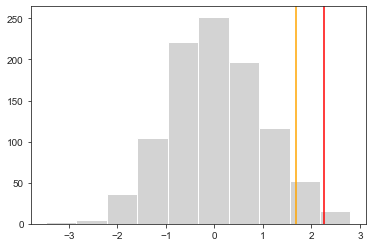

In [345]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color = 'lightgray')

Text(0, 0.5, 'Population in millions')

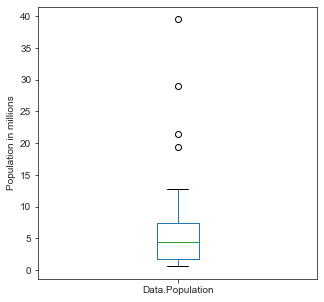

In [119]:
ax = (crime_data.loc[crime_filter]['Data.Population']/1_000_000).plot.box(figsize=(5,5))
ax.set_ylabel('Population in millions')

Note that the Numpy quantile() method is identical to the percentile() method except we pass proportions (ranging from zero to one) into the former and percentages (ranging from zero to 100) into the latter:

### Quartiles

Quartiles, as their name suggests, are quantiles that divide a distribution into quarters by splitting the distribution at the 25th percentile, the median (a.k.a. the 50th percentile), and the 75th percentile:

In [347]:
q = np.percentile(x, [25, 50, 75])
q

array([-6.41297786e-01, -4.78166318e-04,  6.74624480e-01])

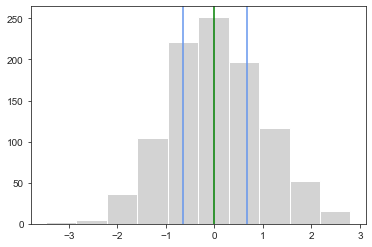

In [348]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
_ = plt.hist(x, color = 'lightgray')

### Deciles

Finally, deciles (from Latin decimus, meaning "tenth") divide a distribution into ten evenly-sized segments:

In [350]:
[i for i in range(10, 100, 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [351]:
d = np.percentile(x, range(10, 100, 10))
d

array([-1.14684122e+00, -7.74890701e-01, -4.99693329e-01, -2.61150259e-01,
       -4.78166318e-04,  2.40341318e-01,  5.28422109e-01,  8.57510134e-01,
        1.31208346e+00])

As examples, we can refer to the bottom 10% as the bottom decile or the first decile, while the top 10% is the top decile or tenth decile.

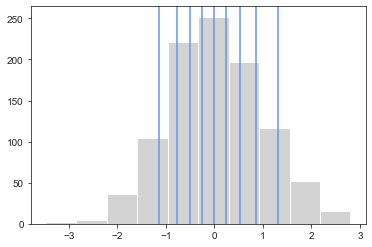

In [352]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
_ = plt.hist(x, color = 'lightgray')

### The Box-and-Whisker Plot

In [353]:
sns.set(style='whitegrid')

Text(0.5, 0, 'Population in millions')

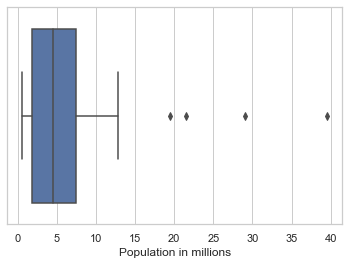

In [395]:
ax = sns.boxplot(x=crime_data.loc[crime_filter]['Data.Population']/1_000_000)
ax.set_xlabel('Population in millions')

The middle line in the box denotes the median

Box edges and median are determined by quartiles:

In [393]:
np.percentile(crime_data.loc[crime_filter]['Data.Population'], [25, 50, 75, 95, 99])

array([ 1789606.,  4467673.,  7446805., 20465649., 34254052.])

In [396]:
np.min(crime_data.loc[crime_filter]['Data.Population'])

578759

Box edges define the **inter-quartile range** (IQR): 

In [386]:
print("IQR: ", crime_data.loc[crime_filter]['Data.Population'].quantile(0.75) - crime_data.loc[crime_data.Year == 2019]['Data.Population'].quantile(0.25))

IQR = crime_data.loc[crime_filter]['Data.Population'].quantile(0.75) - crime_data.loc[crime_data.Year == 2019]['Data.Population'].quantile(0.25)


IQR:  5655928.5


Whisker lengths are determined by furthest data points within $1.5 \times \text{IQR}$ of the box edges.

From above the upper quartile, a distance of 1.5 times the IQR is measured out and a whisker is drawn up to the largest observed point from the dataset that falls within this distance

In [398]:
upper_whisker = crime_data.loc[crime_filter]['Data.Population'].quantile(0.75) + IQR * 1.5
upper_whisker

15930697.75

In this case, the lower whisker could stretch as far down (to the left in the plot) as:

Similarly, a distance of 1.5 times the IQR is measured out below the lower quartile and a whisker is drawn up to the lower observed point from the dataset that falls within this distance. All other observed points are plotted as outliers.

In [399]:
lower_whisker = crime_data.loc[crime_data.Year == 2019]['Data.Population'].quantile(0.25) - IQR*1.5
lower_whisker

-6693016.25

The lowest value is inside of that so the whisker is plotted where that lowest value is: 

In [390]:
np.min(crime_data.loc[crime_filter]['Data.Population'])

578759

There are several values beyond this threshold in the distribution. These values are considered **outliers** and are plotted as individual points:

**note** There are no lower bound outliers so we don't filter them in the below code

In [401]:
crime_data.loc[(crime_filter) & (crime_data['Data.Population'] > upper_whisker)]['Data.Population']

299     39512223
599     21477737
1974    19453561
2634    28995881
Name: Data.Population, dtype: int64

Useful for examining distributions on their own, box-and-whisker plots are especially helpful for comparing distributions:

In [5]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


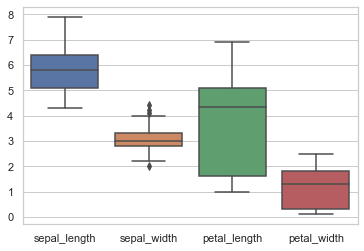

In [403]:
_ = sns.boxplot(data=iris)

In [404]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


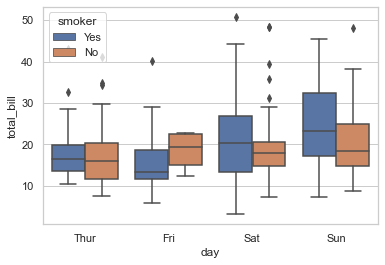

In [405]:
_ = sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)

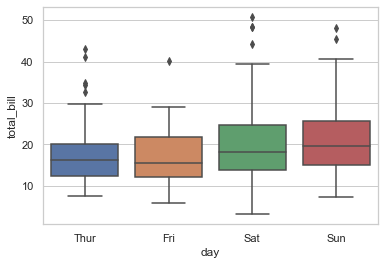

In [457]:
 _ = sns.boxplot(x="day", y="total_bill", data=tips)

Overlay a boxplot with a swarmplot

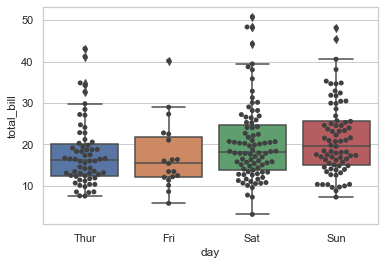

In [458]:
_ = sns.boxplot(x="day", y="total_bill", data=tips)
_ = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

### Frequency Tables and Histograms

In [141]:
binnedPopulation = pd.cut(crime_data.loc[crime_filter]['Data.Population'], 10)
binnedPopulation.value_counts().to_frame().reset_index()

,index,Data.Population
0,"(539825.536, 4472105.4]",26
1,"(4472105.4, 8365451.8]",13
2,"(8365451.8, 12258798.2]",6
3,"(12258798.2, 16152144.6]",2
4,"(35618876.6, 39512223.0]",1
5,"(27832183.8, 31725530.2]",1
6,"(20045491.0, 23938837.4]",1
7,"(16152144.6, 20045491.0]",1
8,"(31725530.2, 35618876.6]",0
9,"(23938837.4, 27832183.8]",0


**note** 

Both frequency tables and percentiles summarize the data by creating bins. 

In general, quartiles and deciles will have the same count in each bin (equal-count bins), but the bin sizes will be different. 

The frequency table, by contrast, will have different counts in the bins (equal-size bins), and the bin sizes will be the same.

### Histogram 

In general, histograms are plotted such that:

- Empty bins are included in the graph.

- Bins are of equal width.

- The number of bins (or, equivalently, bin size) is up to the user.

- Bars are contiguous—no empty space shows between bars, unless there is an empty bin.

Text(0.5, 0, 'Population (millions)')

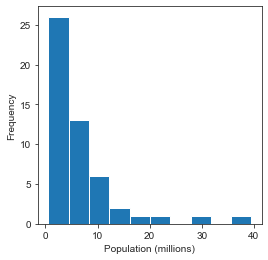

In [142]:
ax = (crime_data.loc[crime_filter]['Data.Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

In statistical theory, **location and variability** are referred to as the first and second moments of a distribution. 

The third and fourth moments are called skewness and kurtosis. 

**Skewness** refers to whether the data is skewed to larger or smaller values, and **kurtosis** indicates the propensity of the data to have extreme values. 

Generally, metrics are not used to measure skewness and kurtosis; instead, these are discovered through visual displays

### Density Plots and Estimates

Related to the histogram is a density plot, which shows the distribution of data values as a continuous line. 

A density plot can be thought of as a smoothed histogram, although it is typically computed directly from the data through a kernel density estimate.

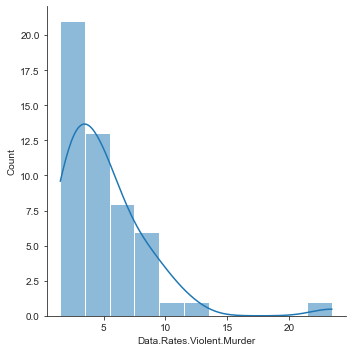

In [156]:
x = crime_data.loc[crime_filter]['Data.Rates.Violent.Murder']
sns.set_style('ticks')
_ = sns.displot(x, kde=True)

# de A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.

Text(0.5, 0, 'Murder Rate (per 100,000)')

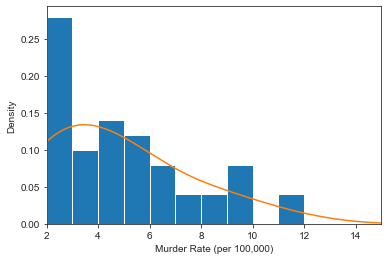

In [157]:
ax = crime_data.loc[crime_filter]['Data.Rates.Violent.Murder'].plot.hist(density=True, xlim=[2,15], bins=range(1,20))
crime_data.loc[crime_filter]['Data.Rates.Violent.Murder'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

# Summary 1.3 

- A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis; it gives a sense of the distribution of the data at a glance.


- A frequency table is a tabular version of the frequency counts found in a histogram.


- A boxplot—with the top and bottom of the box at the 75th and 25th percentiles, respectively—also gives a quick sense of the distribution of the data; it is often used in side-by-side displays to compare distributions.


- A density plot is a smoothed version of a histogram; it requires a function to estimate a plot based on the data (multiple estimates are possible, of course).

## Exploring Binary and Categorical Data 1.4

- For categorical data, simple proportions or percentages tell the story of the data.

In [160]:
airline_data = pd.read_csv('./airline_delay_causes.csv')

In [181]:
airline_filter = airline_data.loc[(airline_data.airport == 'PHX') & (airline_data.year == 2020)]
airline_filter[['arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct']].head(1)


,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
13206,2485.0,210.0,78.65,13.96,86.52,3.88,27.0


### Bar charts

- common visual tool for displaying a single categorical variable. Categories are listed on the x-axis, and frequencies or proportions on the y-axis


Below is a bar chart showing the frequency for each category of flight delays from Phoenix Sky Harbor airport during 2020 plotted as bar chart. 



Text(16.200000000000017, 0.5, 'Count')

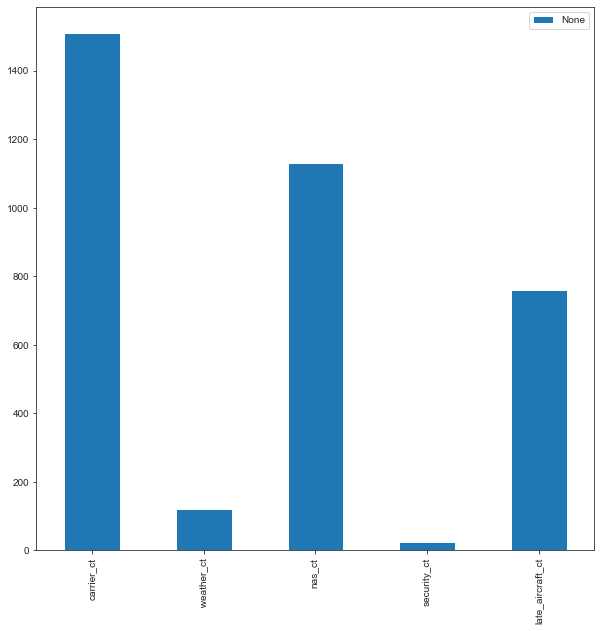

In [197]:
airline_filter[['carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct']].sum().transpose().plot.bar(figsize=(10, 10), legend=True)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [204]:
n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

We can plot the results of our experiment to create a **probability distribution**: 

In [206]:
heads, event_count = np.unique(heads_count, return_counts=True)

In [207]:
heads, event_count

(array([0, 1, 2, 3, 4, 5]), array([ 34, 167, 307, 295, 164,  33]))

In [208]:
event_proba = event_count/n_experiments
event_proba

array([0.034, 0.167, 0.307, 0.295, 0.164, 0.033])

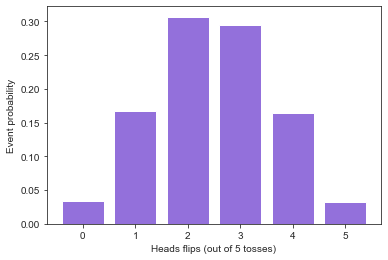

In [209]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

#### Expected Value

- A special type of categorical data is data in which the categories represent or can be mapped to discrete values on the same scale

The expected value is calculated as follows:

- Multiply each outcome by its probability of occurrence.

- Sum these values.

$$EV = (outcome)(proability) + (outcome)(proability) + ... $$

$$ \mathbb{E} = \sum_x xP(x) $$

In [215]:
from math import factorial

In [216]:
def coinflip_prob(n, k):
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    return n_choose_k/2**n

In [217]:
P = [coinflip_prob(5, x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

In [218]:
E = sum([P[x]*x for x in range(6)])
E

2.5

# Summary. 1.4 

- Categorical data is typically summed up in proportions and can be visualized in a bar chart.

- Categories might represent distinct things (apples and oranges, male and female), levels of a factor variable (low, medium, and high), or numeric data that has been binned.

- Expected value is the sum of values times their probability of occurrence, often used to sum up factor variable levels.

## Data Types 1.5

Variables can be divided according to different criteria, such as:

- Quantitative versus qualitative
- Discrete versus continuous
- Dependent versus independent

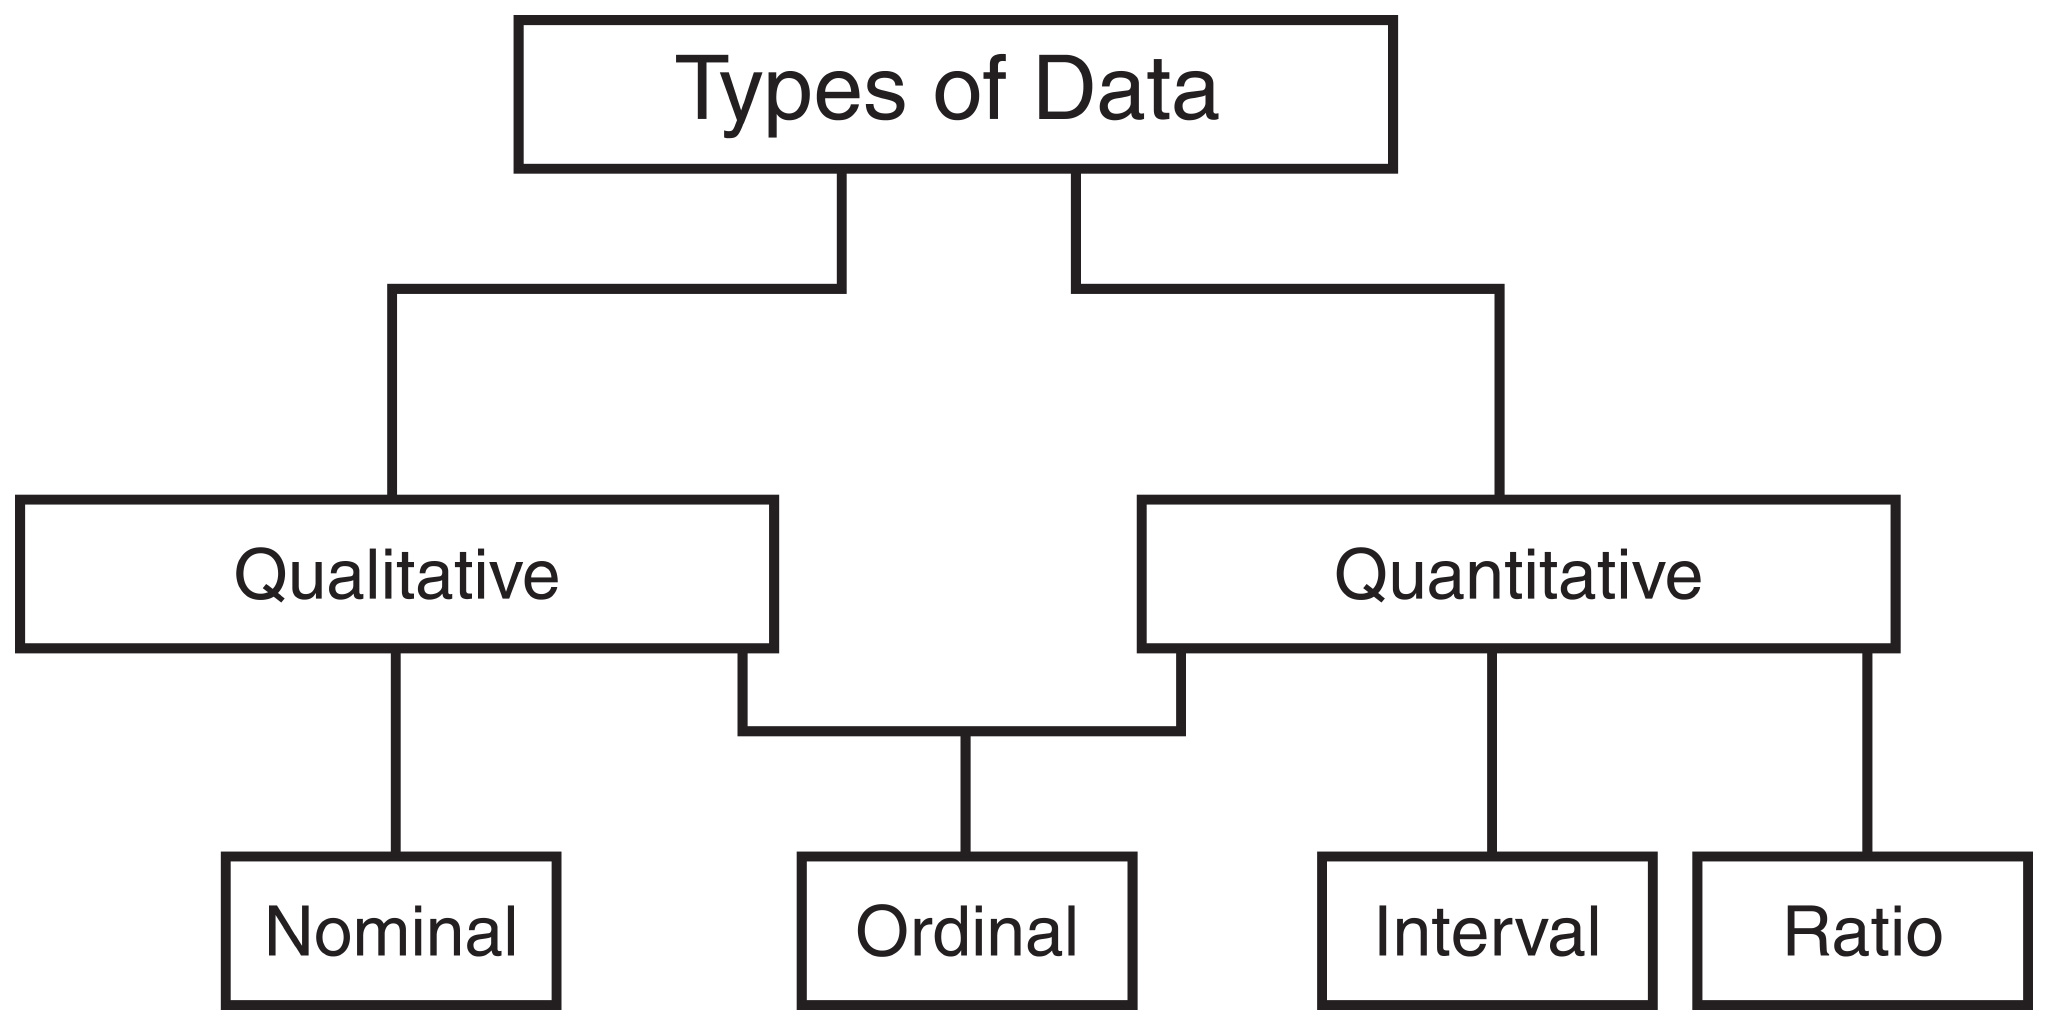

### Quantitative 

- A quantitative variable is a variable with numerical values such as age and income.


- Quantitative variables can be classified as either discrete or continuous

### Qualitative
- A qualitative variable is a variable with descriptive, non-numerical values, such as gender and race

### Discrete

- A discrete variable assumes certain values only, usually with gaps between the values. 

It results from counting or enumeration. 

For example, the number of cars or children is a discrete value. 


If I ask you how many cars you have, you could say “one,” “two,” or “three.” But can you say, “I have 1.5 cars?” Or can you say, “I have 2.5 kids?” Of course not! This is a discrete variable and its value is usually a whole digit with no decimal or fraction

### Continuous

- A continuous variable, on the other hand, can take on any value within a certain range, such as length, distance, and height. 

It results from measurements. 

For example, you can say the distance from my home to the nearest mall is 5.6 miles.

### Dependent

- A dependent variable is a variable whose value is determined by another variable. 

### Independent

- An independent variable is a variable whose value is unaffected by another variable. 

For example, your exam grade depends on how long you studied. 

Here, your exam grade is the dependent variable and your hours of study are the independent variables. 

The dependent variable responds to the independent variable. That’s why it is called the dependent variable–because it depends on the independent variable.


### Nominal

- A nominal level of measurement deals with qualitative variables. In nominal measurement, names or classifications are used to divide the data into separate categories, with no meaningful order.

Examples of nominal data are zip codes (there is no meaningful order or ranking to zip codes), marital status, race, types of dogs, and so forth.

Nominal scale is a naming scale, where variables are simply “named” or labeled, with no specific order

### Ordinal

- The ordinal level of measurement can be qualitative or quantitative data. In ordinal measurements, the order of the numbers or values is meaningful while the magnitude of the values is not.

Has all the properties of nominal data with the added feature that we can rank-order the categories or values from lowest to highest. 

An example of ordinal measurements would be a survey with the options: strongly disagree (1), disagree (2), neutral (3), agree (4), and strongly agree (5).

Here, the order of the numbers is important since (4) is better than (2), but the magnitude of the number assigned to the category is not important. I cannot say that (4) is twice as good as (2). 

Another example of the ordinal level of measurement is movie ratings with 1, 2, 3, or 4 stars. 

We know a 4-star movie is better than a 1-star movie, however we cannot claim that a 4-star movie is 4 times as good as a 1-star movie.

### Interval

- Data type which is measured along a scale, in which each point is placed at equal distance from one another. Interval data always appears in the form of numbers or numerical values where the distance between the two points is standardized and equal.


With interval measurements, both the order and the magnitude of the numbers are meaningful because the distance between the measurements is quantitatively equidistance.

Examples of interval variables include: temperature (Farenheit), temperature (Celcius), pH, SAT score (200-800), credit score (300-850)

### Ratio 

Ratio Data is defined as quantitative data, having the same properties as interval data, with an equal and definitive ratio between each data and absolute “zero” being treated as a point of origin. 

In other words, there can be no negative numerical value in ratio data.


Examples: Income, height, weight, annual sales, market share, product defect rates, time to repurchase, unemployment rate, and crime rate are examples of ratio data.

## Probability Distributions 1.6 

A probability distribution is a mathematical function that describes the likelihood of obtaining the possible values for an event. 

A probability distribution may be either discrete or continuous

### Random Variable 

- A random variable is a quantity that is produced by a random process.


- In probability, a random variable can take on one of many possible values, e.g. events from the state space. A specific value or set of values for a random variable can be assigned a probability.


- A random variable is often denoted as a capital letter, e.g. X, and values of the random variable are denoted as a lowercase letter and an index, e.g. x1, x2, x3.

-----------------------------------------------------------------------------------------

### Probability Mass Functions (PMF)

- Describes likelihood of random variable taking on its possible values


#### Discrete Random variable

- Function describing probability distruction of discrete random variable 


- Notation: Capitalized, italicized *P* 


- Distinguish PMF by random variable P(x), P(y), etc
- Probability of a particular state x: P(x) or P(x=x) or x~P(x)


Three essential properties of P(x)
- Every possible value of x within domain
- Each P(x) can only range from 0-1
- Sum of all P(x) must equal 1 (otherwise known as normalization) 


Examples:
- Likelihood of each NFL team winning the Super Bowl (teams are discrete varibles)
- Dice rolling, card drawing

- **Binomial distribution** to model binary data, such as coin tosses.
- **Poisson distribution** to model count data, such as the count of library book checkouts per hour.
- **Uniform distribution** to model multiple events with the same probability, such as rolling a die.

-----------------------------------------------------------------------------------------

### Probability Density Function (PDF)

- PMF is analogue for continous random variable 


- Notation lower-case, italicized p 
- like PMF, distingusih by p(x), p(y), etc

Three essetnial properties of p(x):
- like PMFs, every possible value has to be in the domain 
- every p(x) must be >= 0
- Intergral p(x)dx = 1 

Probability that x is between points a and b: 
- $\int_{[a,b]} p(x)dx$


Examples: 
- Residential property values 


- Duration of commute from Greenwich, CT to midtown Manhattan


- Weibull distribution: A particularly versatile distribution that analysts use in many settings. Can model left- and right-skewed data and approximate the normal distribution.


- Lognormal distribution: Models right-skewed distributions, particularly for cases where growth rates are independent of size. Provides the best fit for my body fat percentage data.


- Exponential distribution: Models variables in which small values occur more frequently than higher values. Use to model the amount of time between independent events.


- Gamma distribution: Models right-skewed distributions. Use to model the time until the kth event, where k is the shape parameter.


- Uniform distribution: Models symmetric, continuous data where all equal sized ranges have the same probability.


-----------------------------------------------------------------------------------------

### Uniform

The uniform distribution is about as straightforward as they come. It has constant probabilities across the entire range of values in its domain:

You could increase the number of values that you sample and as you increase that to 100,000 to 1 million and so on, these buckets will look more and more and more even because of the **law of large numbers**


Example use cases: 
- Dice Rolling
- Card drawing 
- Model hyperparameters 
- Emission of radioactive particles
- Economic demand 
- Analog-to-digital signal quantization errors 

In [238]:
u = np.random.uniform(size=10000)

In [239]:
sns.set_style('ticks')

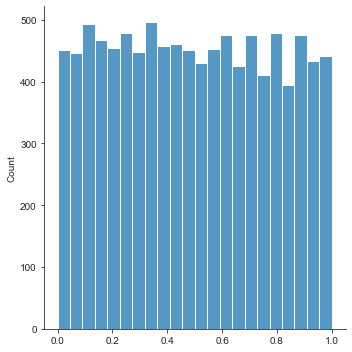

In [240]:
_ = sns.displot(u)

### Gaussian / Normal distribution

Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or **normal distribution**: 

- When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).


Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 


Real-world examples include: 

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT

In [242]:
x = np.random.normal(size=10000)

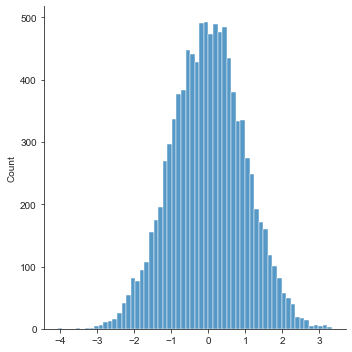

In [243]:
_ = sns.displot(x)

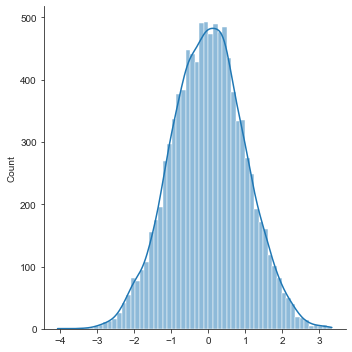

In [244]:
_ = sns.displot(x, kde=True)

**standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

In [245]:
np.mean(x), np.std(x)

(-0.00934510321366509, 0.9903502143992656)

In [248]:
n_experiments = 10000
# 100 tosses with a fair coin
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

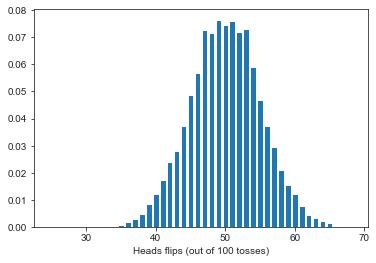

In [249]:
plt.bar(heads, event_proba)
_ = plt.xlabel('Heads flips (out of 100 tosses)')

### Central limit theorem

In short, the CLT is the tendency of the sampling distribution to take on a normal shape as sample size rises.


With large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "t-test" (covered shortly in Intro to Stats) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

In [253]:
# sample without replacement so we can't sample the same data point twice
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 0.79337537, -1.20508547, -1.62327509, -0.49295729,  2.6868663 ,
        0.4242842 ,  0.84131728, -0.72856036, -0.87717693,  0.43442929])

With small samples you're not always going to have a mean close to zero 

In [254]:
x_sample.mean()

0.02532172979027531

Let's define a function for generating sampling distributions of the mean of a given input distribution:

- let's define a function for generating sampling distributions of the mean of a given input distribution. 


- We're going to take our big distribution X, and then we're going to sample small samples from it, like with a sample size of 10.


- And then we'll take the mean of that sample or all of the samples that we take. 


- If 1000 times we take 10 samples then we'll have 1000 means. And we'll take those thousand means and put those means into a distribution. And we'll see what that distribution looks like. 


- **The more samples we take, the more likely that the sampling distribution of the means will be normally distributed**

In [255]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

10 samples of size 10 

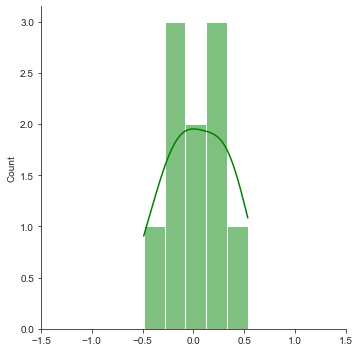

In [260]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

1000 samples of size 10

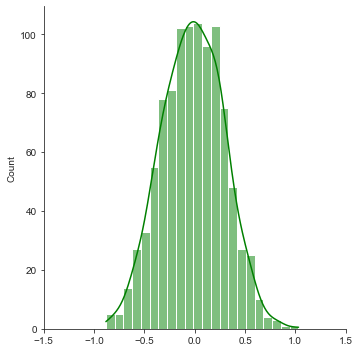

In [257]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

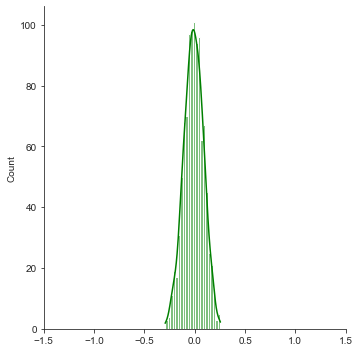

In [261]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

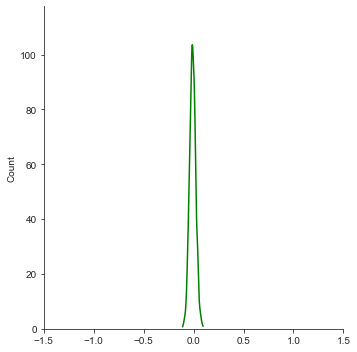

In [262]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

CLT applied to other data distributions

In [263]:
s = st.skewnorm.rvs(10, size=10000)

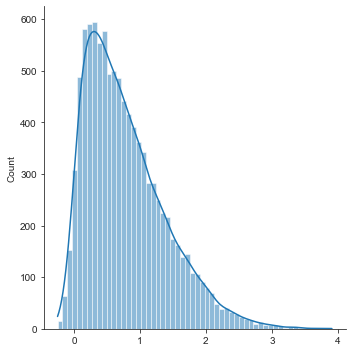

In [264]:
_ = sns.displot(s, kde=True)

The greater the sample size or the more we increase the number of samples that we take, the distribution will become tighter and tighter and more normally distributed around the true mean

In [271]:
s.mean()

0.7790191137148694

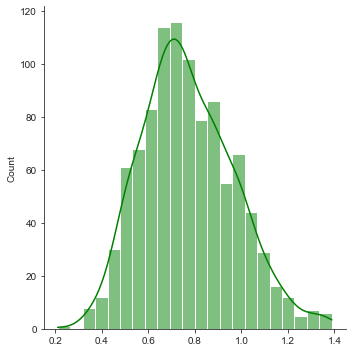

In [265]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

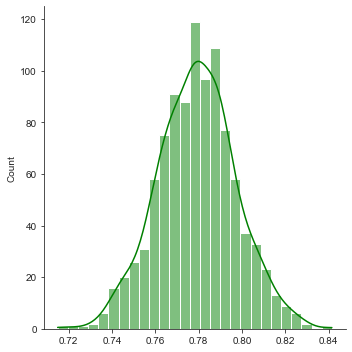

In [266]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

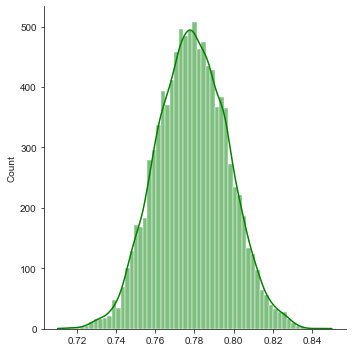

In [268]:
_ = sns.displot(sample_mean_calculator(s, 1000, 10000), color='green', kde=True)

To futher the examples, show how CLT applies to samples from a multimodal distribution

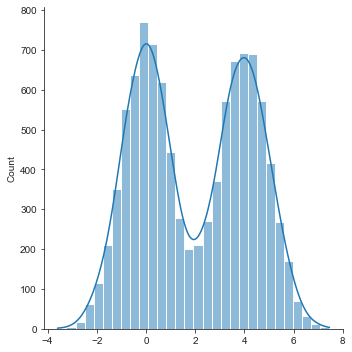

In [272]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))
_ = sns.displot(m, kde=True)

In [275]:
m.mean()

1.9893316393555862

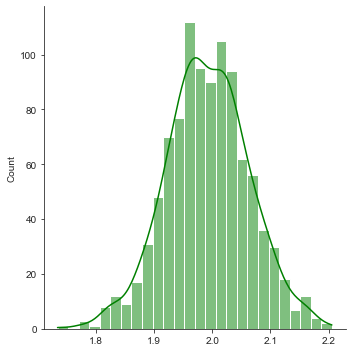

In [273]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

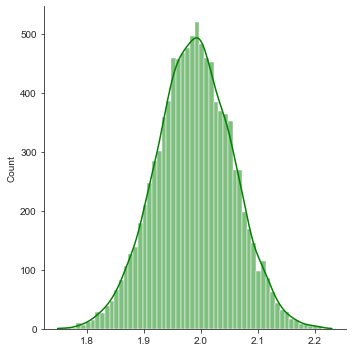

In [274]:
_ = sns.displot(sample_mean_calculator(m, 1000, 10000), color='green', kde=True)

Lastly, we can show how CLT applies to distribution that are even futher away from a normal distribution

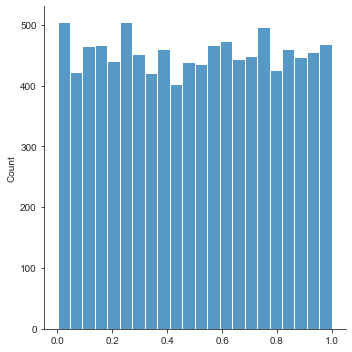

In [277]:
u = np.random.uniform(size=10000)
_ = sns.displot(u)

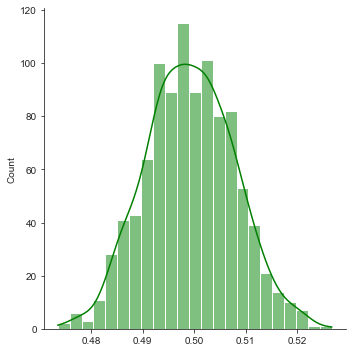

In [278]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

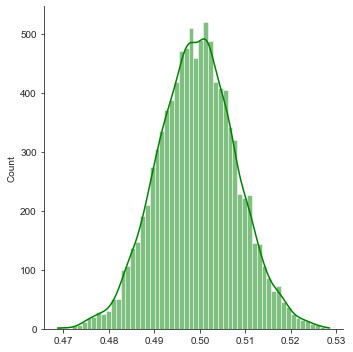

In [279]:
_ = sns.displot(sample_mean_calculator(u, 1000, 10000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "t-test" allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

### Log-Normal Distribution

The natural logarithm of the **log-normal** distribution is normally distributed: 

In [280]:
x = np.random.lognormal(size=10000) # defaults to standard normal mu=0, sigma=1

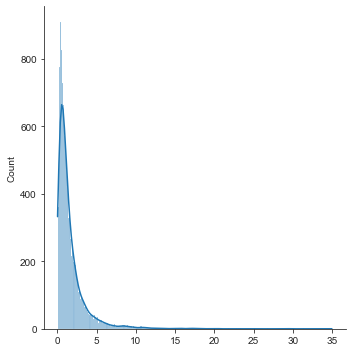

In [281]:
_ = sns.displot(x, kde=True)

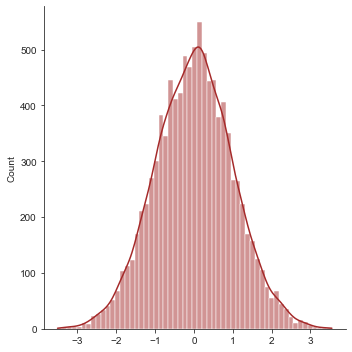

In [283]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples:

- Income
- Length of comments in online forums
- Duration of chess games or Rubik's Cube solves
- Size of publicly-available video files
- Number of hospitalized cases in an epidemic where public interventions are involved

### Exponential Distribution


Relatively squished up against zero and then decreases exponentially toward higher values. Log-normal distribution, in contrast, could take negative values and both increases and decreases.

Exponential Distribution is used to model the time taken between the occurrence of different events

Exponential cannot have negative values

In [286]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one

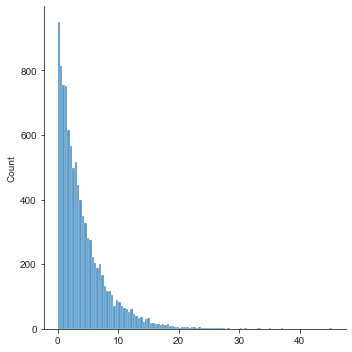

In [287]:
_ = sns.displot(x)

Its logarithm has a skewed distribution: 

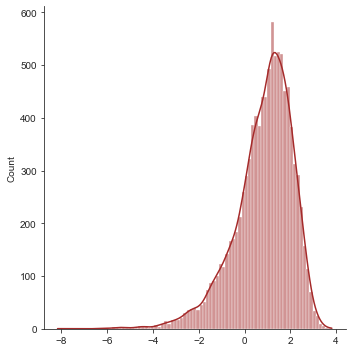

In [289]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples: 

* Time between requests to access Wikipedia pages
* Used frequently in deep learning

### Laplace Distribution

Named after Pierre-Simon Laplace, a key figure in the development of Bayesian statistics.

In [291]:
x = np.random.laplace(size=10000)

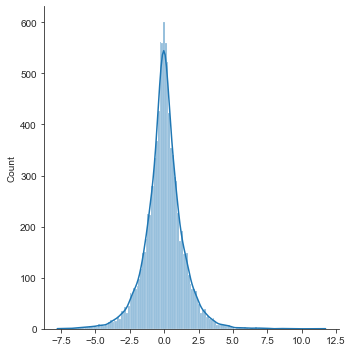

In [292]:
_ = sns.displot(x, kde=True)

In addition to the scale parameter of the exponential function, it has a location parameter that allows it to be centered on any value: 

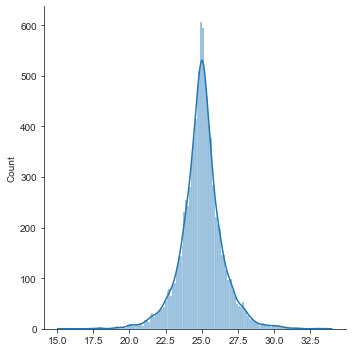

In [294]:
_ = sns.displot(np.random.laplace(loc=25, size=10000), kde=True)

Real-world examples: 

* Extreme weather events, e.g., maximum rainfall in a day
* Many machine learning applications; wherever an acute peak of probability is desired

### Binomial Distribution


All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF). 

We've already been using it for coin flips; it's used for binary (0 or 1) outcome. 

Its parameters are: 

* *n*: number of trials
* *p*: probability of outcome of 1
* *size*: number of experiments with *n* trials each

In [304]:
n = 5
n_experiments = 1000

#### Fair coin (p = 0.5)

In [306]:
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

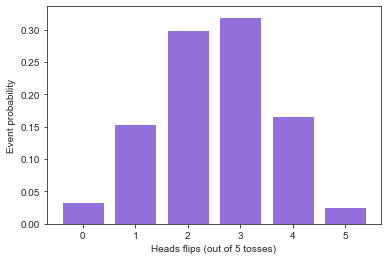

In [307]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

#### Fair coin (p = 0.8)


In [310]:
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

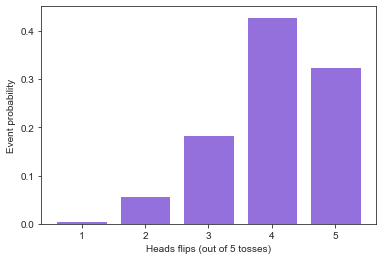

In [311]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

Technically, binomial distributions are created by sampling $n>1$ "Bernoulli trials". The **Bernoulli** distribution is equivalent to the binomial distribution where $n=1$: 

In [314]:
np.random.binomial(1, 0.5)

1

Real-world examples:

* Making it to work on time
* Candidate being invited to interview
* Epidemiology: probability of death or catching disease

### Multinomial Distribution

Generalization of the binomial distribution to discrete random variables with more than two possible outcomes, e.g., the roll of a die: 

In [317]:
n = 1000

In [318]:
rolls = np.random.multinomial(n, [1/6.]*6)
rolls

array([157, 160, 149, 177, 172, 185])

In [319]:
event_proba = rolls/n

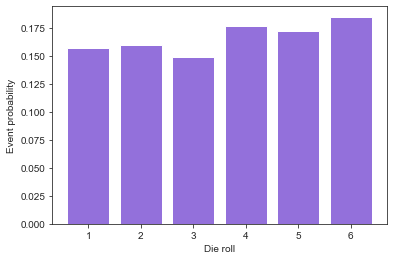

In [320]:
plt.bar(range(1, 7), event_proba, color='mediumpurple')
plt.xlabel('Die roll')
_ = plt.ylabel('Event probability')

As in the binomial case, multinomial distributions are created by sampling $n>1$ multinoulli distributions, where the multinoulli distribution is equivalent to the multinomial distribution when $n=1$: 

In [322]:
np.random.multinomial(1, [1/6.]*6)

array([0, 0, 0, 0, 0, 1])

Since multinomial distributions can represent any categorical variable (e.g., burger, hot dog, pizza; 52 playing cards; NFL teams), not just integer values, we can't always calculate an expected value.

-----------------------------------------------------------------------------------------

### Poisson Distribution

**Poisson** is a third widely-used distribution for discrete random variables.

It's named after French mathematician Simeon Denis Poisson and is used for count data, e.g.: 

* Number of cars that drive by in a minute
* Number of guests at restaurant in an evening
* Number of new hires in a month

First argument to NumPy `poisson()` method is $\lambda$, which must be greater than zero and guides peak of probability distribution. E.g., sampling from Poisson with $\lambda=5$ will tend to draw samples near 5.

In [324]:
lam=5

Second argument is number of samples to draw: 

In [325]:
n=1000

In [326]:
samples = np.random.poisson(lam, n) 

In [327]:
samples[0:20]

array([4, 2, 7, 7, 6, 3, 3, 6, 4, 1, 9, 9, 4, 5, 7, 7, 2, 6, 7, 7])

In [328]:
x, x_count = np.unique(samples, return_counts=True)

In [329]:
x, x_count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15]),
 array([  3,  33,  81, 138, 163, 185, 147, 121,  55,  35,  26,   9,   2,
          1,   1]))

In [330]:
Px = x_count/n

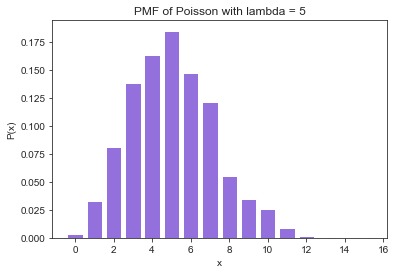

In [331]:
plt.bar(x, Px, color='mediumpurple')
plt.title('PMF of Poisson with lambda = {}'.format(lam))
plt.xlabel('x')
_ = plt.ylabel('P(x)')

### Mixture Distributions

Multinomial distribution (driven by np.random.choice()) with probabilities set by coefficients array determines which of the three distributions to sample from.

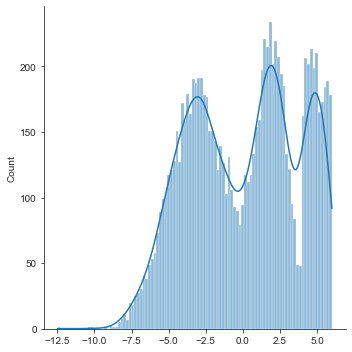

In [333]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sns.displot(sample, bins=100, kde=True)

**Gaussian mixture model** (GMM) is common type of mixture distribution, wherein all of the component distributions are normal.

## Measures of Relatedness 1.7

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$


A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. 

**Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring (linear) relatedness exclusively. Correlation is much more common because of this difference. 

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

**Correlation coefficient**
A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1).

**Correlation matrix**
A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.



In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


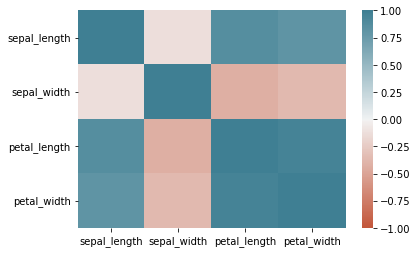

In [12]:
sns.heatmap(iris.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

The standard way to visualize the relationship between two measured data variables is with a **scatterplot**. 

The x-axis represents one variable and the y-axis another, and each point on the graph is a record

In [7]:
x = iris.sepal_length
y = iris.petal_length

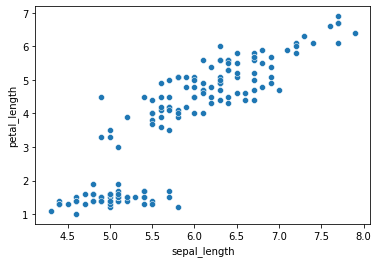

In [38]:
_ = sns.scatterplot(x=x, y=y)

- The correlation coefficient measures the extent to which two paired variables (e.g., height and weight for individuals) are associated with one another.


- When high values of v1 go with high values of v2, v1 and v2 are positively associated.


- When high values of v1 go with low values of v2, v1 and v2 are negatively associated.


- The correlation coefficient is a standardized metric, so that it always ranges from –1 (perfect negative correlation) to +1 (perfect positive correlation).


- A correlation coefficient of zero indicates no correlation, but be aware that random arrangements of data will produce both positive and negative values for the correlation coefficient just by chance.

In [14]:
n = iris.sepal_width.size

In [16]:
xbar, ybar = x.mean(), y.mean()

In [17]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [18]:
cov = sum(product)/n
cov

1.2658200000000006

In [19]:
r = cov/(np.std(x)*np.std(y))
r

0.8717537758865835

We reached this point in *Probability*. Now, as for how to determine a *p*-value, we first calculate the *t*-statistic...
$$ t = r \sqrt{\frac{n-2}{1-r^2}} $$

In [21]:
t = r*((n-2)/(1-r**2))**(1/2)
t

21.646019345759807

We can convert the *t*-value into a *p*-value using Student's *t*-distribution (similar to the normal *z*-distribution, but varies based on number of data points in sample; see [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for more detail):

In [25]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1) # 2nd arg to t.cdf() is "degrees of freedom"

In [26]:
p = p_from_t(t, n-1) 
p

1.0386674194495906e-47

In [27]:
-np.log10(p)

46.98352349096045

This confirms that iris sepal length is extremely positively correlated with petal length (also seen in the heatmap above). 

The above code demonstrated how to calculate the perason correlation coefficient from scratch. 

All of the above can be done in a single line with SciPy's `pearsonr()` method: 

In [31]:
st.pearsonr(x, y)

(0.8717537758865831, 1.0386674194498099e-47)

In [40]:
st.pearsonr??

And, for reference, here's a correlation that is not significant ($r \approx 0$): 

r : float
   Pearson's correlation coefficient.
   
p-value : float
   Two-tailed p-value.

In [39]:
st.pearsonr(x=iris.sepal_length, y=iris.sepal_width)

(-0.11756978413300206, 0.15189826071144766)

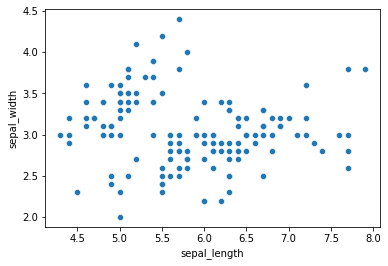

In [32]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

##### The Coefficient of Determination

Also known as $r^2$, this is the proportion of variance in one variable explained by another. 

It can range from 0 to 1 and it is simply the square of the Pearson $r$:

In [42]:
rsq = r**2
rsq

0.7599546457725157

In this case, it indicates that 76% of the variance in iris petal length can be explained by sepal length. (This is easier to understand where one variable could straightforwardly drive variation in the other.

For comparison, only 1.4% of the variance in sepal width can be explained by sepal length: 

In [43]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

0.013822654141080705

#### Correlation vs Causation

Correlation doesn't imply **causation** on its own. E.g., sepal length and petal length are extremely highly correlated, but this doesn't imply that sepal length causes petal length or vice versa. 

There is a lot to causality and I recommend Judea Pearl's [*Causality*](http://bayes.cs.ucla.edu/BOOK-2K/), the classic technical text on the topic, if you're keen to explore this in depth. [*The Book of Why*](http://bayes.cs.ucla.edu/WHY/) is an exceptional lay alternative by the same author.

In brief, three criteria are required for inferring causal relationships: 

1. **Covariation**: Two variables vary together (this criterion is satisfied by sepal and petal length)
2. **Temporal precedence**: The affected variable must vary *after* the causal variable is varied. 
3. **Elimination of extraneous variables**: We must be sure no third variable is causing the variation. This can be tricky for data we obtained through observation alone, but easier when we can control the causal variable, e.g., with (ideally double-blind) randomized control trials. 

Some examples of where we could infer causality from correlation in ML: 
* Additional neurons --> higher accuracy
* Additional servers or RAM --> shorter inference time
* Removal of pronouns --> less unwanted bias

#### Correcting for Multiple Comparisons

A major issue with frequentist statistics is the issue of multiple comparisons:

* If you perform 20 statistical tests where there is no real effect (i.e., the null hypothesis is true), then we would expect one of them to come up significant by chance alone (i.e., a *false positive* or *Type I error*).
* If you perform a hundred tests in such a circumstance, then you should expect five false positives.

The most straightforward, and indeed the most widely-used, solution is the **Bonferroni correction** (named after the 20th c. Italian mathematician Carlo Emilio Bonferroni). Assuming, we'd like an overall $\alpha = .05$: 

* If we're planning on conducting ten tests ($m=10$), the significance threshold for each individual test is $\frac{\alpha}{m} = \frac{.05}{10} = .005$
* With 20 tests, it's $\frac{\alpha}{m} = \frac{.05}{20} = .0025$
* With 100 tests, it's $\frac{\alpha}{m} = \frac{.05}{100} = .0005$

(Other, less straightforward, approaches for adjusting $\alpha$ for multiple comparisons exist. They're beyond our scope, but the major ones are listed under the *General methods of alpha adjustment for multiple comparisons* heading [here](https://en.wikipedia.org/wiki/Multiple_comparisons_problem#See_also).)

-----------------------------------------------------------------------------------------

## Statistical Experiments And Significance Testing 1.8

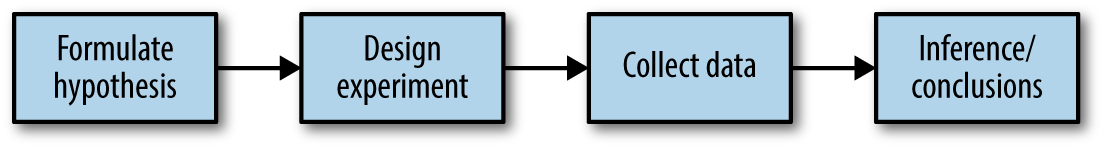

### A/B Testing


An A/B test is an experiment with two groups to establish which of two treatments, products, procedures, or the like is superior. Often one of the two treatments is the standard existing treatment, or no treatment. If a standard (or no) treatment is used, it is called the control. A typical hypothesis is that a new treatment is better than the control.

- **Treatment**
Something (drug, price, web headline) to which a subject is exposed.


- **Treatment group**
A group of subjects exposed to a specific treatment.


- **Control group**
A group of subjects exposed to no (or standard) treatment.


- **Randomization**
The process of randomly assigning subjects to treatments.


- **Subjects**
The items (web visitors, patients, etc.) that are exposed to treatments.


- **Test statistic**
The metric used to measure the effect of the treatment.


Key Ideas of A/B testing

- Subjects are assigned to two (or more) groups that are treated exactly alike, except that the treatment under study differs from one group to another.

- Ideally, subjects are assigned randomly to the groups.

### Hypothesis Tests


Hypothesis tests, also called significance tests, are ubiquitous in the traditional statistical analysis of published research. Their purpose is to help you learn whether random chance might be responsible for an observed effect.

- **Null hypothesis**
The hypothesis that chance is to blame.


- **Alternative hypothesis**
Counterpoint to the null (what you hope to prove).


- **One-way test**
Hypothesis test that counts chance results only in one direction.


- **Two-way test**
Hypothesis test that counts chance results in two directions.

Why do Hypothesis testing

- The answer lies in the tendency of the human mind to underestimate the scope of natural random behavior. 


- One manifestation of this is the failure to anticipate extreme events, or so-called “black swans” (see “Long-Tailed Distributions”). 


- Another manifestation is the **tendency to misinterpret random events** as having patterns of some significance. 


- Statistical hypothesis testing was invented as a way to protect researchers from being fooled by random chance.

In a properly designed A/B test, you collect data on treatments A and B in such a way that any observed difference between A and B must be due to either:

- Random chance in assignment of subjects


- A true difference between A and B

### Null Hypothesis


Hypothesis tests use the following logic: “Given the human tendency to react to unusual but random behavior and interpret it as something meaningful and real, in our experiments we will require proof that the difference between groups is more extreme than what chance might reasonably produce.”

This involves a baseline assumption that the treatments are equivalent, and any difference between the groups is due to chance. 

This baseline assumption is termed the null hypothesis. 

Our hope, then, is that we can in fact prove the null hypothesis wrong and show that the outcomes for groups A and B are more different than what chance might produce.

Key Ideas 

- A null hypothesis is a logical construct embodying the notion that nothing special has happened, and any effect you observe is due to random chance.


- The hypothesis test assumes that the null hypothesis is true, creates a “null model” (a probability model), and tests whether the effect you observe is a reasonable outcome of that model.

-----------------------------------------------------------------------------------------

## Statistical Significance and p-Values 1.9

Statistical significance is how statisticians measure whether an experiment (or even a study of existing data) yields a result more extreme than what chance might produce. 

**If the result is beyond the realm of chance variation, it is said to be statistically significant.**

- **p-value**
Given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual or extreme as the observed results.


- **Alpha**
The probability threshold of “unusualness” that chance results must surpass for actual outcomes to be deemed statistically significant.


- **Type 1 error**
Mistakenly concluding an effect is real (when it is due to chance).


- **Type 2 error**
Mistakenly concluding an effect is due to chance (when it is real).

### *p*-values

These quantify the *p*robability that a given observation would occur by chance alone. 

For example, we saw above that with our simulated 10k exam results, only 47 folks attained a *z*-score above 2.5 and only 64 attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.11% of the time: 
$$ \frac{47+64}{10000} = 0.0111 = 1.11\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity (from z-score example) , the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's cumulative distribution function (CDF):

In [98]:
st.norm.cdf??

 Using the same data from cs101 example in z-scores

In [105]:
mu = 90
sigma = 2

Passing in a z-score of -2.5

In [95]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [99]:
p_below*10000

62.096653257761325

low boundry 

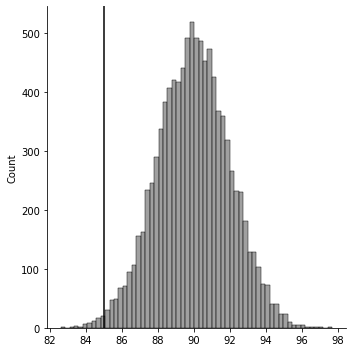

In [106]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='black')

In [107]:
st.norm.cdf(2.5)

0.9937903346742238

In [108]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

Sampling form a perfect normal distriubtion, we would expect that 62 of the 10k to occur above the 2.5 z-score by chance 

In [109]:
p_above*10000

62.09665325776159

High boundary 

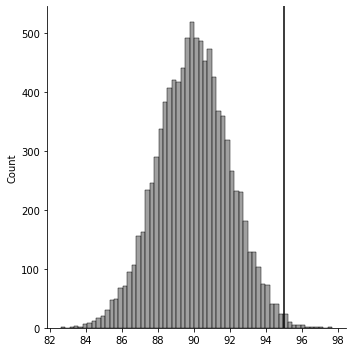

In [110]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='black')

Probability of having any values 2.5 above and/or below the mean is .01

In [111]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

You can expect 124 values to be outside of the upper and lower bounds set above 

In [112]:
p_outside*10000

124.1933065155229

In other words, assuming a normal distribution, the probability (the *p*-value) of a sampled value being at least 2.5 standard deviations away from the mean by chance alone is $p \approx .0124$.

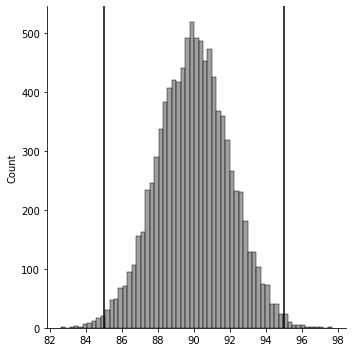

In [114]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='black')
_ = plt.axvline(mu-2.5*sigma, color='black')

The frequentist convention is that if a *p*-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$.

For example, with a fair coin, the probability of throwing six heads *or* six tails in a six-coin-flip experiment is 0.03125 ($p = 0.015625$ for *either of* six heads or six tails).

If a friend of yours hands you a coin, the **null hypothesis** (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should *reject the null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$.

The z-scores corresponding to  𝛼=.05  can be obtained from the normal distribution's percent point function (PPF), which facilitates the inverse of the CDF. To capture 95% of the values around the mean, we leave 2.5% at the bottom of the distribution and 2.5% at the top:`

In [116]:
st.norm.ppf(.025)

-1.9599639845400545

In [117]:
st.norm.ppf(.975)

1.959963984540054